## Basit Doğrusal Regresyon

In [1]:
import pandas as pd 
ad = pd.read_csv("Advertising.csv", usecols = [1,2,3,4]) 
df = ad.copy () 
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [2]:
#df = df.iloc[:,1:len(df)]

In [3]:
#df.head()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [6]:
df.isnull().values.any()

False

In [7]:
df.corr() #kıyaslama inceleme

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


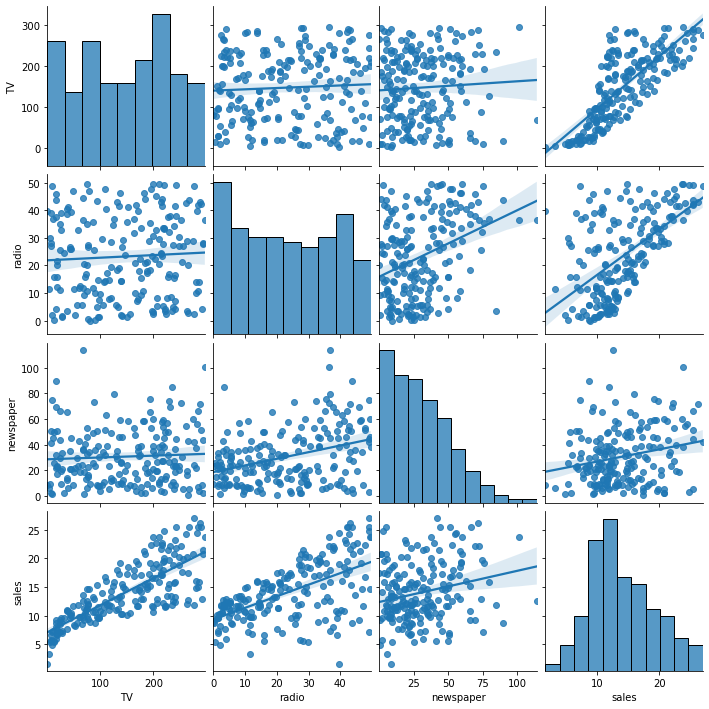

In [8]:
import seaborn as sns 
sns.pairplot(df,kind = "reg");

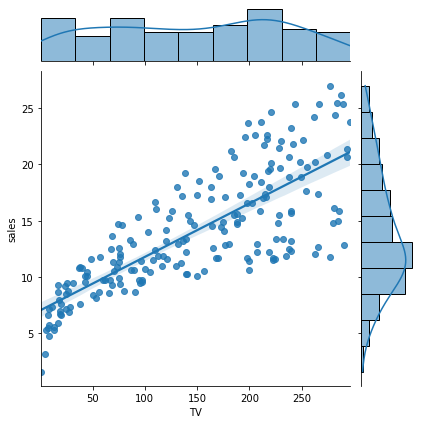

In [9]:
sns.jointplot(x = "TV", y = "sales",data = df, kind = "reg")

## Statsmodels ile modelleme 
istatiksel anlamda detaylı bilgiye erişmek isterseniz "statsmodels" methodu kullanılır.

In [10]:
import statsmodels.api as sm

D:\anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [11]:
X = df [["TV"]] 
X[0:5]

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [12]:
X = sm.add_constant(X) 
X[0:5]

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [13]:
y = df["sales"]

In [14]:
y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [15]:
lm = sm.OLS(y,X)

In [16]:
model = lm.fit()

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 05 May 2021   Prob (F-statistic):           1.47e-42
Time:                        15:06:14   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
 ## ÖNEMLİ NOT (MULAKAT SORUSU OLUYOR)

In [19]:
# r-squared : r kare değeri önemlidir.bağımsız değerin bağımlı değişkenliğini açıklama başarısıdır 
#yani elimizdeki Tv değişkeni satış değişkenliğinin yaklaşık %60 ını açıklayabilmektedir. 
# düzeltilmiş r kare değeri ise "adj r squared": r kare şişmeye meğillidir ilgili ilgisiz her şey olabilir ve yanıltıcıdır.düzeltimiş r kare 
# duyarlılığı daha ve daha doğru,düzgündür gereksiz bilgi yoktur

In [20]:
#F-statistic : modelin anlamlılığla alakalı 
# p-value değeridir = prob(f - statistic)

In [21]:
#model karşılaştırma 
# AIC AND BIC

In [22]:
# coef and std err kısmı önemlidir = yorumlanma kısmıdır --> modelde kullanılan değişkenin kat sayısı ve sabit kat sayısı yorumlanıır. 

In [23]:
import statsmodels.formula.api as smf 
lm = smf.ols("sales ~ TV",df) 
model = lm.fit() 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 05 May 2021   Prob (F-statistic):           1.47e-42
Time:                        15:06:14   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
#katsayıları verin dersek,parametreleri
model.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [25]:
#katsayı detayları için  
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [26]:
#güven aralığına erişmek için 
model.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [27]:
#modelin anlamlılığına ilişkin istatiksel değerlere erişmek istersek 
model.f_pvalue

1.4673897001947095e-42

In [28]:
# e ifadesini kaldırmak için 
print("f_pvalue:", "%.4f" % model.f_pvalue)

f_pvalue: 0.0000


In [29]:
#f istatistiğine erişmek için 
print("fvalue:", "%.4f" % model.fvalue)

fvalue: 312.1450


In [30]:
#değişkenlerin parametrelerin anlamlılılğna ilişkin 

In [31]:
print("tvalue:" , "%2f" % model.tvalues[0:1])

tvalue: 15.360275


In [32]:
#modelin istatistiğine ilişkin,modelin başarısına erişebiliriz bir nevi
model.mse_model

3314.6181668686486

In [33]:
model.rsquared

0.611875050850071

In [34]:
model.rsquared_adj

0.6099148238341623

In [35]:
#modelin tahmin ettiği değerlere erişmek önemlidir 
model.fittedvalues[0:5]

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [36]:
#gercek değerlere erişmek 
y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [37]:
#mulakat sorusu bu verinin matematiksel formunu yazın şeklinde soruluyor!!!!!!

In [38]:
#modelin denklemini yazma 

In [39]:
print("Sales =" + str("%2f" % model.params[0]) + "+ TV" + "*" + str("%2f" % model.params[1]))

Sales =7.032594+ TV*0.047537


In [40]:
#modelin görseli

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


NameError: name 'plt' is not defined

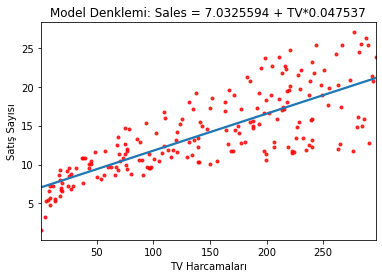

In [41]:
g = sns.regplot(df["TV"], df["sales"], ci = None, scatter_kws = {'color':'r', 's':9}) 
g.set_title("Model Denklemi: Sales = 7.0325594 + TV*0.047537") 
g.set_ylabel("Satış Sayısı") 
g.set_xlabel("TV Harcamaları" ) 
plt.xlim(-10,310) 
plt.ylim(bottom = 0);

In [42]:
#lineer regresyon ile model kurma 
from sklearn.linear_model import LinearRegression

In [43]:
X = df[["TV"]] 
y = df["sales"] 
reg = LinearRegression () 
model = reg.fit(X,y) 
model.intercept_ 
model.coef_ 

array([0.04753664])

In [44]:
model.score(X,y) #başarı oranı değil r kare değeridir

0.611875050850071

In [45]:
#modelin başarı değeri için,tahmini
model.predict(X)[0:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

## Tahmin

Model Denklemi: 

Sales = 7.03 + TV*0.04 

Örneğin 30 birim TV harcaması olduğunda satışların tahmini değeri ne olur ?

In [46]:
7.03 + 30*0.04

8.23

In [47]:
X = df[["TV"]] 
y = df["sales"] 
reg = LinearRegression () 
model = reg.fit(X,y) 

In [48]:
model.predict([[30]])

array([8.45869276])

In [49]:
yeni_veri = [[5], [90],[200]]

In [50]:
model.predict(yeni_veri)

array([ 7.27027675, 11.31089119, 16.53992164])

## Artıklar ve Makine Öğrenmesindeki Önemi

In [51]:
from sklearn.metrics import mean_squared_error, r2_score

In [52]:
lm = smf.ols("sales ~ TV", df) 
model = lm.fit() 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 05 May 2021   Prob (F-statistic):           1.47e-42
Time:                        15:06:53   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
mse = mean_squared_error(y, model.fittedvalues) 

In [54]:
mse

10.512652915656757

In [55]:
import numpy as np 
rmse = np.sqrt(mse)

In [56]:
rmse

3.2423221486546887

In [57]:
reg.predict(X) [0:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

In [58]:
#gercek değerler 
y[0:10]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
5     7.2
6    11.8
7    13.2
8     4.8
9    10.6
Name: sales, dtype: float64

In [59]:
#karşılaştırma tablosu yapma (gerçek değer vs tahmin edilen değer)
k_t = pd.DataFrame({"gercek_y" : y[0:10], 
                   "tahmin_y" : reg.predict(X)[0:10]})

In [60]:
k_t

,gercek_y,tahmin_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [61]:
#dataFrame üzerinde görmek istersem 
k_t["hata"] = k_t["gercek_y"] - k_t["tahmin_y"]

In [62]:
k_t

,gercek_y,tahmin_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [63]:
#eksi değerler artı değerleri götürdüğü için karesini alacaz

In [74]:
k_t["hata_kare "] = k_t["hata"]**2

In [75]:
k_t

,gercek_y,tahmin_y,hata,hata_kare
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [78]:
#toplam hata için 
np.sum(k_t["hata_kare"])

KeyError: 'hata_kare'

In [82]:
np.mean(k_t["hata_kare"])

KeyError: 'hata_kare'

In [68]:
np.sqrt(np.mean(k_t["hata_kare"]))

KeyError: 'hata_kare'

In [69]:
#hatayı sunma şekli için dağılımına bakmak lazım !

In [70]:
#modelin artıklarına bakma

In [71]:
model.resid[0:10]

0    4.129225
1    1.252026
2    1.449776
3    4.265605
4   -2.727218
5   -0.246162
6    2.034050
7    0.453502
8   -2.641409
9   -5.930414
dtype: float64

In [72]:
from matplotlib import pyplot as plt

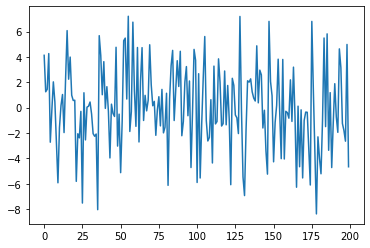

In [73]:
plt.plot(model.resid)